In [1]:
%matplotlib inline
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.utils.np_utils import to_categorical
import time
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dropout, Dense
from keras.models import Model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


Lets load the data

In [2]:
train_data = pandas.read_csv("Train.csv").sample(frac=1, random_state=int(time.time())).reset_index(drop=True)
valid_data = pandas.read_csv("Validate.csv").sample(frac=1, random_state=int(time.time())).reset_index(drop=True)
test_data = pandas.read_csv("TestData.csv")

In [3]:
columns = np.array(train_data.columns.values.tolist()[1:-1])
tau=128
tau2=len(columns)
columns[tau:tau2]

array(['V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137',
       'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145',
       'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153',
       'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161',
       'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169',
       'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177',
       'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185',
       'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193',
       'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201',
       'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209',
       'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217',
       'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225',
       'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233',
       'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241',
      

In [4]:
y_train_data = train_data["Label"].values
X_train_data = normalize(np.array(train_data[columns[tau:tau2]].copy()))
print("Training Data\t", X_train_data.shape, y_train_data.shape)

y_valid_data = valid_data["Label"].values
X_valid_data = normalize(np.array(valid_data[columns[tau:tau2]].copy()))
print("Validation Data\t", X_valid_data.shape, y_valid_data.shape)


X_test_data = normalize(np.array(test_data[columns[tau:tau2]].copy()))
print("Test Data\t", X_test_data.shape)


Training Data	 (23491, 128) (23491,)
Validation Data	 (4567, 128) (4567,)
Test Data	 (8192, 128)


In [5]:
# X_train = X_train_data
# y_train = y_train_data
# X_test  = X_valid_data
# y_test  = y_valid_data
ration = len(y_valid_data)/(len(y_valid_data)+len(y_train_data))
ration = 0.01
X_train, X_test, y_train, y_test = train_test_split(
    np.concatenate((X_train_data, X_valid_data), axis=0), 
    np.concatenate((y_train_data, y_valid_data), axis=0), 
    test_size=ration, 
    random_state=int(time.time())
    )
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(27777, 128) (27777,) (281, 128) (281,)


In [6]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(X_train, y_train)
print("Perceptron\t", p.score(X_test,y_test))

Perceptron	 0.900355871886


In [7]:
inputs = Input(shape=X_train[0].shape, dtype='float32', name='Input')
x = inputs
x = Dense(8192, activation='relu', kernel_initializer='glorot_uniform', name="Hidden_Layer")(x)
x = Dropout(0.5,  seed=42, name="Dropout")(x)
predictions = Dense(2, activation='sigmoid', name="Output")(x)
model = Model(
    inputs=inputs, 
    outputs=predictions
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 128)               0         
_________________________________________________________________
Hidden_Layer (Dense)         (None, 8192)              1056768   
_________________________________________________________________
Dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
Output (Dense)               (None, 2)                 16386     
Total params: 1,073,154
Trainable params: 1,073,154
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.fit(
    X_train, 
    to_categorical(y_train), 
    epochs=10, 
    batch_size=2048,
    validation_split=0.1
)

Train on 24999 samples, validate on 2778 samples
Epoch 1/10
24999/24999 [==============================] - 12s - loss: 0.1688 - acc: 0.9440 - val_loss: 0.1710 - val_acc: 0.9401
Epoch 2/10
24999/24999 [==============================] - 12s - loss: 0.1678 - acc: 0.9447 - val_loss: 0.1718 - val_acc: 0.9402
Epoch 3/10
24999/24999 [==============================] - 12s - loss: 0.1666 - acc: 0.9449 - val_loss: 0.1706 - val_acc: 0.9401
Epoch 4/10
24999/24999 [==============================] - 12s - loss: 0.1653 - acc: 0.9456 - val_loss: 0.1700 - val_acc: 0.9415
Epoch 5/10
24999/24999 [==============================] - 12s - loss: 0.1643 - acc: 0.9456 - val_loss: 0.1695 - val_acc: 0.9411
Epoch 6/10
24999/24999 [==============================] - 13s - loss: 0.1635 - acc: 0.9458 - val_loss: 0.1689 - val_acc: 0.9408
Epoch 7/10
24999/24999 [==============================] - 13s - loss: 0.1623 - acc: 0.9464 - val_loss: 0.1683 - val_acc: 0.9417
Epoch 8/10
24999/24999 [==============================]

In [24]:
prediction = model.predict(X_valid_data)
prediction

array([[  2.83197337e-03,   9.97076392e-01],
       [  4.31852564e-02,   9.56965804e-01],
       [  9.56580162e-01,   4.40360419e-02],
       ..., 
       [  1.08522561e-03,   9.98829067e-01],
       [  4.71188978e-04,   9.99533176e-01],
       [  9.31825697e-01,   6.88423663e-02]], dtype=float32)

In [25]:
binary_pred = []
for i in range(0, len(prediction)):
    if(prediction[i][0]<prediction[i][1]):
        binary_pred.append(1)
    else:
        binary_pred.append(0)

np.array(binary_pred)

array([1, 1, 0, ..., 1, 1, 0])

In [26]:
score = 0
y_test = y_valid_data
for i in range(len(binary_pred)):
    if(y_test[i]==binary_pred[i]):
        score += 1
        
print("Accuracy\t", score*1.0/len(binary_pred))  

Accuracy	 0.9244580687541055


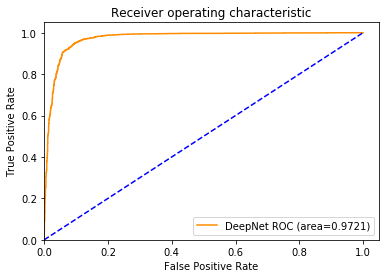

Area Under Curve	 0.972128998572


In [27]:
y_true = y_test
y_pred = np.array([prediction[i][1] for i in range(len(prediction))])

fpr, tpr, thres = roc_curve(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', linestyle='-', label='DeepNet ROC (area=%0.4f)' % auc)
plt.plot([0,1],[0,1], color='blue', linestyle='--')
plt.xlim([0,1.05])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

print('Area Under Curve\t', auc )


In [28]:
test_prediction = model.predict(X_test_data)
y_test_pred = np.array([test_prediction[i][1] for i in range(len(test_prediction))])

In [29]:
y_test_pred


array([ 0.1012165 ,  0.98851764,  0.98562467, ...,  0.99510264,
        0.9752897 ,  0.98197091], dtype=float32)

In [30]:
with open('Stuxnet_result.csv','w') as fp:
    fp.write("ID,Score\n")
    ids = test_data["Id"].tolist()
    for i in range(len(y_test_pred)):
        fp.write(ids[i] + "," + str(y_test_pred[i]) + '\n')
